In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,PolynomialFeatures
from sklearn.compose import ColumnTransformer

In [14]:
data=pd.read_csv("covid19_day_wise.csv")
data

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


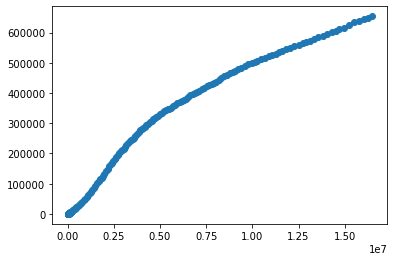

In [15]:
X1=data["Confirmed"].values
X1=X1.reshape(-1,1)
#X2=data["No. of countries"]
Y=data["Deaths"].values
Y=Y.reshape(-1,1)
plt.scatter(X1,Y)

In [16]:
lr=LinearRegression()
lr.fit(X1,Y)

LinearRegression()

Text(0.5, 1.0, 'Covid-19 Death curve')

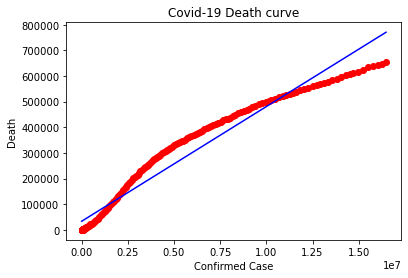

In [17]:
plt.scatter(X1,Y,color="red")
plt.plot(X1,lr.predict(X1),color="blue")
plt.xlabel("Confirmed Case")
plt.ylabel("Death")
plt.title("Covid-19 Death curve")

In [18]:
polynomial_reg=PolynomialFeatures(degree=2)
real_x_poly=polynomial_reg.fit_transform(X1)
training_x,testing_x,training_y,testing_y= train_test_split(real_x_poly,Y,test_size=0.2,random_state=0) 

In [19]:
polynomial_reg.fit(training_x,training_y)

PolynomialFeatures()

In [20]:
LR=LinearRegression()
LR.fit(training_x,training_y)

LinearRegression()

Text(0.5, 1.0, 'Covid-19 Death curve')

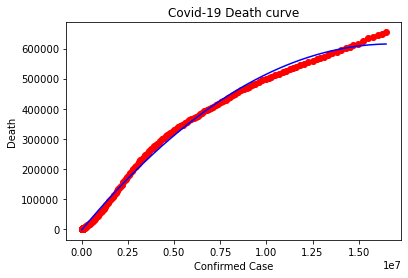

In [21]:
plt.scatter(X1,Y,color="red")
plt.plot(X1,LR.predict(real_x_poly),color="blue")
plt.xlabel("Confirmed Case")
plt.ylabel("Death")
plt.title("Covid-19 Death curve")

In [22]:
print(r2_score(Y, LR.predict(real_x_poly)))

0.9968785426462675
